# Complex Waves

This notebook is a demonstration of a way to track frequency that Jamey suggested to me. It involves a complex frequency term, and a phase term. The frequency term is below, it is formed as a complex exponential, and results in an unit of change per sample.

$$ freq = e^{j \omega \frac{f}{f_s}}$$

The phase is initialized at 0 + 1j for sine (or vice versa), and the frequency per sample term is multiplied by the phase of each sample. The phase does not exceed 2pi radians this way. Also note that you may  switch between the sine and cosines by using the real and imaginary parts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


##Grabs the GoldCode module from the root of the repo
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from GoldCode import GoldCode
from GPSData import IQData

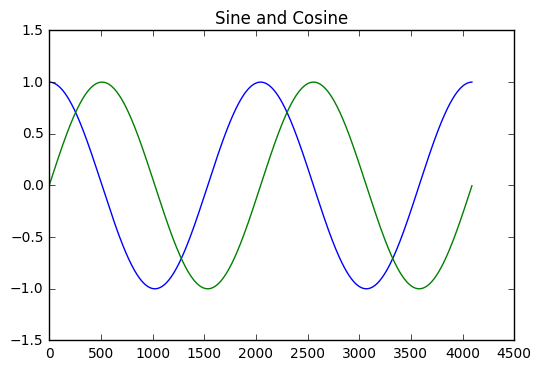

In [19]:
#Pick frequencies
fs = 4.092*10**6 # Sampling Frequency [Hz]
ff = 2000  # Wave Frequency [Hz] 

#Initialize terms
freq = np.exp(1j * 2 * np.pi * (ff/fs))
phase = 1 + 0j

#Init samples
wav = np.zeros(4092, dtype = 'complex')


for n, w in enumerate(wav):
    wav[n] = phase
    phase = phase * freq
    
plt.plot(np.real(wav))
plt.plot(np.imag(wav))

plt.title('Sine and Cosine')
plt.show()

So now we are travelling around the unit circle, and we can use arctan to give us the phase error. The phase and frequency errors are essentially the same, but it is difficult to tell whether the phase error results from frequency or just phase. If assume frequency, and make adjustments over time, a phase error will correct itself. 